In [126]:
#!/usr/bin/env python3
## import libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf

In [127]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [128]:
#model = load_model('/home/lab606a/catkin_ws/src/pointcloud/models/60hz_culstm/prediction_top5')
model = load_model('./saved model/500_data/prediction_fixed_top6')

In [129]:
dataset = pd.read_csv("./datasets/split by random for distributed/prediction/top6_test.csv", header=None)
dataset = dataset.fillna(0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,74.6749,285.567,43.1003,74.3494,272.427,44.4252,74.0396,260.043,45.1918,73.7457,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
1,74.7448,298.225,40.8540,74.9115,283.100,42.4760,74.5872,271.415,43.3527,74.2766,...,25.1911,65.2273,-49.0870,24.7188,0.0000,0.0000,0.0000,0.0,0.0,0.0
2,74.2067,295.263,41.5840,73.6341,281.563,42.9839,72.8452,268.593,44.0689,72.3340,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
3,75.2830,299.459,41.6988,75.4644,288.210,43.4427,75.3854,277.488,44.8586,75.5353,...,33.1505,76.7627,-35.2970,34.2547,76.8912,-44.0978,35.1785,0.0,0.0,0.0
4,74.9630,291.291,41.4298,74.6394,280.557,42.1295,74.5698,269.055,42.7524,74.2540,...,31.9451,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,74.9736,292.507,42.0092,74.6364,278.896,43.8972,74.3219,267.407,44.7337,73.7822,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
246,74.9478,288.334,42.6639,74.8557,273.719,44.4630,74.5469,263.670,45.3280,74.2317,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
247,75.4821,291.264,41.6861,75.3909,279.232,42.5860,75.5500,267.825,43.1891,75.6799,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
248,75.0270,301.007,40.9374,74.6826,286.941,42.8848,74.6047,273.795,43.9588,74.3004,...,31.1385,67.3037,-49.9819,33.8366,0.0000,0.0000,0.0000,0.0,0.0,0.0


In [130]:
np.set_printoptions(suppress=True)

In [131]:
dataset = np.array(dataset)

In [132]:
tmp = dataset[0,:]
tmp

array([ 74.6749  , 285.567   ,  43.1003  ,  74.3494  , 272.427   ,
        44.4252  ,  74.0396  , 260.043   ,  45.1918  ,  73.7457  ,
       248.264   ,  45.9251  ,  73.4598  , 236.037   ,  46.1128  ,
        72.9646  , 224.414   ,  46.0788  ,  72.7085  , 213.451   ,
        45.3833  ,  72.459   , 201.144   ,  44.44    ,  72.2214  ,
       188.598   ,  43.5272  ,  71.9903  , 177.63    ,  41.4891  ,
        71.5757  , 166.33    ,  39.5578  ,  71.1819  , 154.835   ,
        37.5374  ,  70.9863  , 143.976   ,  34.8826  ,  70.4391  ,
       133.531   ,  31.8661  ,  70.0918  , 122.957   ,  28.6591  ,
        69.7548  , 112.861   ,  24.9448  ,  69.6028  , 102.098   ,
        21.3001  ,  69.1266  ,  92.2675  ,  17.0653  ,  68.6692  ,
        82.8355  ,  12.7531  ,  68.2356  ,  72.7638  ,   8.14536 ,
        67.9695  ,  62.6975  ,   3.39381 ,  67.654   ,  53.0768  ,
         4.04416 ,  67.3209  ,  41.9559  ,   8.76583 ,  66.7617  ,
        31.6131  ,  12.8913  ,  66.2689  ,  21.3763  ,  16.650

In [133]:
def calculate_vis_hitting_point(arr):
    __hitting_point = -45
    if (-50 <= float(np.min(arr)) <= -45):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row,1]-arr[row-1,1])
        __vis_hitting_point = (1-w1)*arr[row,:] + w1*arr[row-1,:]
    elif (-45 < float(np.min(arr)) < -40):
        index = np.argmin(arr)
        row = int((index-0)/3)
        w1 = (arr[row,1]-__hitting_point) / (arr[row-1,1]-arr[row,1])
        __vis_hitting_point = arr[row,:] - w1*(arr[row-1,:]-arr[row,:])
    #print("vis hitting point = ", __vis_hitting_point)
    return __vis_hitting_point

In [134]:
calculate_vis_hitting_point(tmp.reshape(int(tmp.shape[0]/3),3))

array([ 63.38623808, -45.        ,  32.87312841])

In [135]:
def modify_input(arr):
    ka = np.array([0])
    for i in range(arr.shape[0]):
        if arr[i,] != 0:
            ka = np.hstack((ka,arr[i,]))
    ka = ka[1:,]
    return ka

In [136]:
kk = modify_input(tmp)
kk

array([ 74.6749  , 285.567   ,  43.1003  ,  74.3494  , 272.427   ,
        44.4252  ,  74.0396  , 260.043   ,  45.1918  ,  73.7457  ,
       248.264   ,  45.9251  ,  73.4598  , 236.037   ,  46.1128  ,
        72.9646  , 224.414   ,  46.0788  ,  72.7085  , 213.451   ,
        45.3833  ,  72.459   , 201.144   ,  44.44    ,  72.2214  ,
       188.598   ,  43.5272  ,  71.9903  , 177.63    ,  41.4891  ,
        71.5757  , 166.33    ,  39.5578  ,  71.1819  , 154.835   ,
        37.5374  ,  70.9863  , 143.976   ,  34.8826  ,  70.4391  ,
       133.531   ,  31.8661  ,  70.0918  , 122.957   ,  28.6591  ,
        69.7548  , 112.861   ,  24.9448  ,  69.6028  , 102.098   ,
        21.3001  ,  69.1266  ,  92.2675  ,  17.0653  ,  68.6692  ,
        82.8355  ,  12.7531  ,  68.2356  ,  72.7638  ,   8.14536 ,
        67.9695  ,  62.6975  ,   3.39381 ,  67.654   ,  53.0768  ,
         4.04416 ,  67.3209  ,  41.9559  ,   8.76583 ,  66.7617  ,
        31.6131  ,  12.8913  ,  66.2689  ,  21.3763  ,  16.650

In [137]:
k = np.array([0])
for i in range(tmp.shape[0]):
    if tmp[i,] != 0:
        k = np.hstack((k,tmp[i,]))
k = k[1:,]
print(k)

[ 74.6749   285.567     43.1003    74.3494   272.427     44.4252
  74.0396   260.043     45.1918    73.7457   248.264     45.9251
  73.4598   236.037     46.1128    72.9646   224.414     46.0788
  72.7085   213.451     45.3833    72.459    201.144     44.44
  72.2214   188.598     43.5272    71.9903   177.63      41.4891
  71.5757   166.33      39.5578    71.1819   154.835     37.5374
  70.9863   143.976     34.8826    70.4391   133.531     31.8661
  70.0918   122.957     28.6591    69.7548   112.861     24.9448
  69.6028   102.098     21.3001    69.1266    92.2675    17.0653
  68.6692    82.8355    12.7531    68.2356    72.7638     8.14536
  67.9695    62.6975     3.39381   67.654     53.0768     4.04416
  67.3209    41.9559     8.76583   66.7617    31.6131    12.8913
  66.2689    21.3763    16.6509    65.8391    11.3084    20.07
  65.4849     0.888697  23.2287    65.0714    -8.99424   25.8743
  64.6283   -18.8616    28.1244    64.181    -28.8041    30.2476
  63.7358   -38.7458    31.

In [138]:
k2 = sequence.pad_sequences(k.reshape(1,k.shape[0]), maxlen=k.shape[0]+27, padding='post', dtype='float32')
k2

array([[ 74.6749  , 285.567   ,  43.1003  ,  74.3494  , 272.427   ,
         44.4252  ,  74.0396  , 260.043   ,  45.1918  ,  73.7457  ,
        248.264   ,  45.9251  ,  73.4598  , 236.037   ,  46.1128  ,
         72.9646  , 224.414   ,  46.0788  ,  72.7085  , 213.451   ,
         45.3833  ,  72.459   , 201.144   ,  44.44    ,  72.2214  ,
        188.598   ,  43.5272  ,  71.9903  , 177.63    ,  41.4891  ,
         71.5757  , 166.33    ,  39.5578  ,  71.1819  , 154.835   ,
         37.5374  ,  70.9863  , 143.976   ,  34.8826  ,  70.4391  ,
        133.531   ,  31.8661  ,  70.0918  , 122.957   ,  28.6591  ,
         69.7548  , 112.861   ,  24.9448  ,  69.6028  , 102.098   ,
         21.3001  ,  69.1266  ,  92.2675  ,  17.0653  ,  68.6692  ,
         82.8355  ,  12.7531  ,  68.2356  ,  72.7638  ,   8.14536 ,
         67.9695  ,  62.6975  ,   3.39381 ,  67.654   ,  53.0768  ,
          4.04416 ,  67.3209  ,  41.9559  ,   8.76583 ,  66.7617  ,
         31.6131  ,  12.8913  ,  66.2689  ,  21.

In [139]:
def rolling(arr):
    anc = 0
    t = arr[:,anc:27]
    print(t)
    anc += 3

In [140]:
for i in range(0,(k2.shape[1]-27),3):
    t = k2[:,i:i+27]
    print(t.reshape(9,3))

[[ 74.6749 285.567   43.1003]
 [ 74.3494 272.427   44.4252]
 [ 74.0396 260.043   45.1918]
 [ 73.7457 248.264   45.9251]
 [ 73.4598 236.037   46.1128]
 [ 72.9646 224.414   46.0788]
 [ 72.7085 213.451   45.3833]
 [ 72.459  201.144   44.44  ]
 [ 72.2214 188.598   43.5272]]
[[ 74.3494 272.427   44.4252]
 [ 74.0396 260.043   45.1918]
 [ 73.7457 248.264   45.9251]
 [ 73.4598 236.037   46.1128]
 [ 72.9646 224.414   46.0788]
 [ 72.7085 213.451   45.3833]
 [ 72.459  201.144   44.44  ]
 [ 72.2214 188.598   43.5272]
 [ 71.9903 177.63    41.4891]]
[[ 74.0396 260.043   45.1918]
 [ 73.7457 248.264   45.9251]
 [ 73.4598 236.037   46.1128]
 [ 72.9646 224.414   46.0788]
 [ 72.7085 213.451   45.3833]
 [ 72.459  201.144   44.44  ]
 [ 72.2214 188.598   43.5272]
 [ 71.9903 177.63    41.4891]
 [ 71.5757 166.33    39.5578]]
[[ 73.7457 248.264   45.9251]
 [ 73.4598 236.037   46.1128]
 [ 72.9646 224.414   46.0788]
 [ 72.7085 213.451   45.3833]
 [ 72.459  201.144   44.44  ]
 [ 72.2214 188.598   43.5272]
 [ 71.9

In [141]:
a = np.array([1,2,3,4,5,6,7])
a[-2,]

6

In [163]:
a = np.array([[1,2,3,4,5,6],[4,5,6,7,8,9]])
a[-1:,1:]

array([[5, 6, 7, 8, 9]])

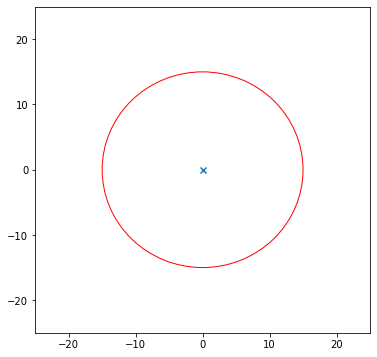

In [178]:
plt.figure(figsize=(6,6))
circle = plt.Circle((0, 0), 15, color='r', fill=False)

ax = plt.gca()
ax.add_artist(circle)
ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))

plt.scatter(0,0,marker='x')

In [148]:
__hp = -45
for i in range(0,(k2.shape[1]-27),3):
    t = k2[:,i:i+27]
    pred = model.predict(t.reshape(1,9,3))
    print("input = \n", t.reshape(1,9,3))
    print("output = \n", pred)
    if pred[0,0,1] < -45:
        #print(t[0,-3:])
        w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
        hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
        print("pred hp = \n", hp)
        #input()
    if -45 < pred[0,0,1] < -40:
        w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
        hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
        print("pred hp = \n", hp)
        #input()

input = 
 [[[ 74.6749 285.567   43.1003]
  [ 74.3494 272.427   44.4252]
  [ 74.0396 260.043   45.1918]
  [ 73.7457 248.264   45.9251]
  [ 73.4598 236.037   46.1128]
  [ 72.9646 224.414   46.0788]
  [ 72.7085 213.451   45.3833]
  [ 72.459  201.144   44.44  ]
  [ 72.2214 188.598   43.5272]]]
output = 
 [[[ 71.652336 178.44623   41.678112]
  [ 71.67424  167.67029   39.67284 ]
  [ 71.236694 156.29788   37.353813]
  [ 70.90537  145.23932   34.85778 ]
  [ 70.55729  134.5384    31.95057 ]
  [ 70.28885  124.205894  28.699986]
  [ 70.05093  114.0103    25.167427]
  [ 69.785645 103.8673    21.385326]
  [ 69.4518    94.00026   17.378544]]]
input = 
 [[[ 74.3494 272.427   44.4252]
  [ 74.0396 260.043   45.1918]
  [ 73.7457 248.264   45.9251]
  [ 73.4598 236.037   46.1128]
  [ 72.9646 224.414   46.0788]
  [ 72.7085 213.451   45.3833]
  [ 72.459  201.144   44.44  ]
  [ 72.2214 188.598   43.5272]
  [ 71.9903 177.63    41.4891]]]
output = 
 [[[ 71.67778  166.39877   39.287582]
  [ 71.28096  155.61246 

In [159]:
hitting_point = -45
__hp = -45
err = np.zeros((1,3))
flag = True

for i in range(dataset.shape[0]):
    tmp = dataset[i,:] ## read trajectory
    ip = modify_input(tmp) ## remove zeros from pandas
    
    ## calculate vis hitting point
    ipp = ip.reshape(int(ip.shape[0]/3),3)
    if (-50 <= float(np.min(ipp)) <= -45):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row,1]-ipp[row-1,1])
        vis_hitting_point = (1-w1)*ipp[row,:] + w1*ipp[row-1,:]
    elif (-45 < float(np.min(ipp)) < -40):
        index = np.argmin(ipp)
        row = int((index-0)/3)
        w1 = (ipp[row,1]-hitting_point) / (ipp[row-1,1]-ipp[row,1])
        vis_hitting_point = ipp[row,:] - w1*(ipp[row-1,:]-ipp[row,:])
    print(vis_hitting_point)
    
    ## padding for model
    ip2 = sequence.pad_sequences(ip.reshape(1,ip.shape[0]), maxlen=ip.shape[0]+27, padding='post', dtype='float32')
    
    for i in range(0,(ip2.shape[1]-27),3):
        t = ip2[:,i:i+27]
        pred = model.predict(t.reshape(1,9,3))
        #print("input = \n", t.reshape(1,9,3))
        #print("output = \n", pred)
        if -50 < pred[0,0,1] < -45 and flag == True:
            #print(t[0,-3:])
            w = abs(__hp-t[0,-3:]) / abs(pred[0,0,1]-t[0,-3:])
            hp = w*pred[0,0,:] + (1-w)*t[0,-3:].reshape(1,3)
            print("pred hp a = \n", hp)
            flag = False
            #input()
        if -45 < pred[0,0,1] < -40 and flag == True:
            w = abs(__hp-pred[0,0,1]) / (pred[0,0,1]-t[0,-2])
            hp = pred[0,0,:] - w*(pred[0,0,:]-t[0,-3:])
            print("pred hp b = \n", hp)
            flag = False
            #input()
    flag = True
    error = vis_hitting_point - hp
    err = np.vstack((err, error))

[ 63.38623808 -45.          32.87312841]
pred hp a = 
 [[ 61.789764 -45.        33.10419 ]]
[ 65.53919253 -45.          24.96052439]
pred hp b = 
 [ 65.385124 -45.        25.239279]
[ 59.63162496 -45.          32.54530228]
[ 76.90437297 -45.          35.27320189]
pred hp b = 
 [ 76.55316 -45.       35.22901]
[ 70.32058773 -45.          31.98493147]
pred hp b = 
 [ 71.2648  -45.       32.03196]
[ 70.29477656 -45.          29.26848695]
pred hp b = 
 [ 70.2134   -45.        28.994514]
[ 70.89676118 -45.          32.51526861]
pred hp a = 
 [[ 70.9099   -45.        32.698772]]
[ 75.95642199 -45.          30.66151096]
pred hp b = 
 [ 76.29904  -45.        31.277603]
[ 55.07783803 -45.          32.29091124]
pred hp b = 
 [ 54.73478  -45.        31.658234]
[ 68.41491678 -45.          30.96717151]
pred hp b = 
 [ 68.72055  -45.        30.386698]
[ 82.40393402 -45.          33.26816122]
pred hp b = 
 [ 82.61434  -45.        33.055347]
[ 63.71888862 -45.          28.98908324]
[ 75.62865542 -45.  

pred hp a = 
 [[ 72.6935   -45.        35.987507]]
[ 75.3060317  -45.          22.02421607]
pred hp b = 
 [ 75.305176 -45.        22.508091]
[ 71.65375248 -45.          26.43987911]
pred hp b = 
 [ 71.52437  -45.        28.546705]
[ 74.37711863 -45.          34.58607768]
pred hp b = 
 [ 74.88648 -45.       34.14505]
[ 68.4620187  -45.          30.98301264]
pred hp b = 
 [ 68.57538  -45.        30.769554]
[ 69.93505973 -45.          30.51977017]
pred hp b = 
 [ 69.08329  -45.        27.894281]
[ 66.35317376 -45.          25.25009736]
pred hp b = 
 [ 66.09249 -45.       25.99658]
[ 66.84673564 -45.          30.68034053]
pred hp b = 
 [ 66.92307  -45.        30.226748]
[ 81.54041709 -45.          30.37939087]
pred hp b = 
 [ 81.066864 -45.        30.051348]
[ 73.47272255 -45.          33.98489925]
pred hp a = 
 [[ 73.25832 -45.       34.11385]]
[ 65.04421745 -45.          26.86341002]
pred hp b = 
 [ 64.82791  -45.        26.879515]
[ 68.56613185 -45.          31.49603282]
pred hp b = 
 [

[ 62.35221806 -45.          31.02032707]
pred hp b = 
 [ 60.886745 -45.        29.00589 ]
[ 62.9737515  -45.          30.96340058]
pred hp b = 
 [ 62.33251 -45.       30.85353]
[ 67.36834559 -45.          34.18716618]
pred hp b = 
 [ 67.19446  -45.        34.116608]
[ 75.28165324 -45.          31.13345474]
pred hp b = 
 [ 75.53925  -45.        31.265537]
[ 73.38522087 -45.          29.77713306]
pred hp b = 
 [ 73.32388  -45.        30.378838]
[ 60.11300204 -45.          23.17576628]
pred hp b = 
 [ 59.641804 -45.        24.598518]
[ 60.49559906 -45.          23.65075093]
pred hp b = 
 [ 59.295315 -45.        23.725914]
[ 68.01338662 -45.          30.45744101]
pred hp b = 
 [ 68.39906 -45.       30.44274]
[ 68.01338662 -45.          30.45744101]
pred hp b = 
 [ 68.43643  -45.        32.623653]
[ 67.27349272 -45.          33.98901984]
pred hp b = 
 [ 65.61238  -45.        32.121525]
[ 70.71982559 -45.          26.08074345]
pred hp b = 
 [ 70.97405  -45.        26.858969]
[ 79.91178309 -4

In [160]:
err

array([[  0.        ,   0.        ,   0.        ],
       [  1.59647367,   0.        ,  -0.23106242],
       [  0.15406832,   0.        ,  -0.27875441],
       [ -5.75349925,   0.        ,   7.30602348],
       [  0.35121135,   0.        ,   0.04419035],
       [ -0.94421329,   0.        ,  -0.04702806],
       [  0.08137477,   0.        ,   0.27397249],
       [ -0.01313567,   0.        ,  -0.18350382],
       [ -0.34261976,   0.        ,  -0.61609219],
       [  0.34305867,   0.        ,   0.6326776 ],
       [ -0.30563376,   0.        ,   0.58047374],
       [ -0.21040771,   0.        ,   0.21281378],
       [-18.89545311,   0.        ,  -4.0662642 ],
       [ -0.10118009,   0.        ,   0.07146838],
       [  0.15327488,   0.        ,  -0.12393639],
       [ -0.10002604,   0.        ,  -0.00629066],
       [  0.18146411,   0.        ,   0.17402838],
       [ -0.22831453,   0.        ,  -0.38192198],
       [  1.23903042,   0.        ,   3.45756275],
       [ -0.06636783,   0.     

249
accuray = 99.6%


Text(0.5, 1, 'X Z hitting plane')

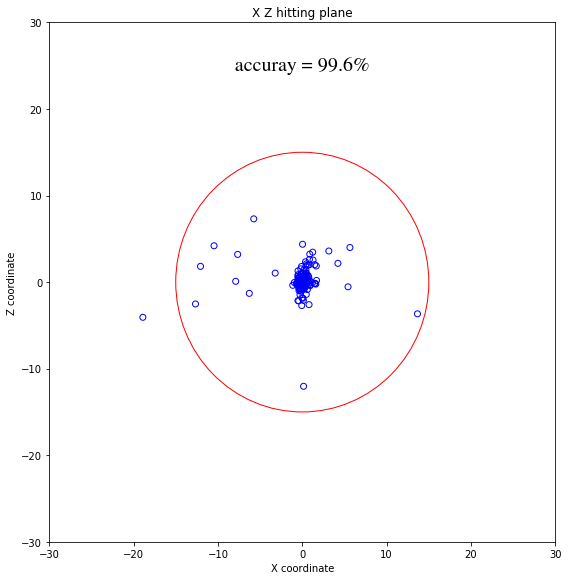

In [161]:
import matplotlib.pyplot as plt
err2 = err[1:,:]
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
print(correct)
print("accuray = {}%".format(correct/err2.shape[0]*100))
text = str("accuray = {}%".format(correct/err2.shape[0]*100))

plt.figure(figsize=(8,8))
x = y = np.arange(-15, 15, 0.005)
x, y = np.meshgrid(x,y)
#plt.contour(x, y, x**2 + y**2, [15*15])
circle2 = plt.Circle((0, 0), 15, color='r', fill=False)

ax = plt.gca()
ax.add_artist(circle2)
ax.set_xlim((-30, 30))
ax.set_ylim((-30, 30))

plt.scatter(err2[:,0], err2[:,2], facecolors='none', edgecolors='b')
#plt.ylim(-20,20)
plt.xlabel('X coordinate')
plt.ylabel('Z coordinate')
plt.text(0,25,text, fontsize=20, fontname='FreeSerif', horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.title('X Z hitting plane')
#plt.savefig('./top5_test2.svg')

In [147]:
err2.shape
correct = 0
for i in range(err2.shape[0]):
    if err2[i,0] < 15 and err2[i,0] > -15 and err2[i,2] < 15 and err2[i,2] > -15:
        correct += 1
        
correct

0